<a href="https://colab.research.google.com/github/aa1132025/README/blob/main/K_Means_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****Clustering Online Data with K-Means, Elbow Method, and PCA**** bold text

You’ll explore an online retail dataset using K-Means clustering to group similar items, the Elbow Method to find the best number of clusters, and PCA to simplify the data for visualization. It runs on Google Colab—no setup needed! Share your work on GitHub under an MIT License.

**Learning Objectives**

* Use K-Means clustering to find groups in data.

* Apply the Elbow Method to pick the right number of clusters.
* Simplify data with PCA for visualization.
* Work with a real online dataset.
* Share your ML project online.

**Tools**

* Platform: Google Colab (free)
* Libraries: scikit-learn, pandas, matplotlib, seaborn
* Dataset: UCI Online RetailLinks to an external site.
* GitHub: For sharing
* License: MIT License

**Objective 1: Setting Up and Loading Data**

**Goal:** Start Colab and load the dataset.

**What You’ll Learn:** Handling real-world data.

In [ ]:
# Install required packages.
!pip install pandas scikit-learn matplotlib seaborn openpyxl

import pandas as pd

# Load the dataset from the UCI repository.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

# Quick look of the dataset.
print(data.head())
print(data.shape)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
(541909, 8)


**Objective 2: Cleaning the Data**

**Goal:** Prepare data for clustering.

**What You’ll Learn:** Data preprocessing.

In [ ]:
# Remove rows with missing values.
data = data.dropna()

# Select numerical columns.
data_numeric = data[['Quantity', 'UnitPrice']]

# Remove outliers: keep only positive values.
data_numeric = data_numeric[(data_numeric['Quantity'] > 0) & (data_numeric['UnitPrice'] > 0)]

# Quick look of the cleaned dataset.
print(data_numeric.head())
print(data_numeric.shape)

   Quantity  UnitPrice
0         6       2.55
1         6       3.39
2         8       2.75
3         6       3.39
4         6       3.39
(397884, 2)


**Objective 3: Using the Elbow Method**

**Goal:** Find the best number of clusters.

**What You’ll Learn:** Optimizing K-Means.

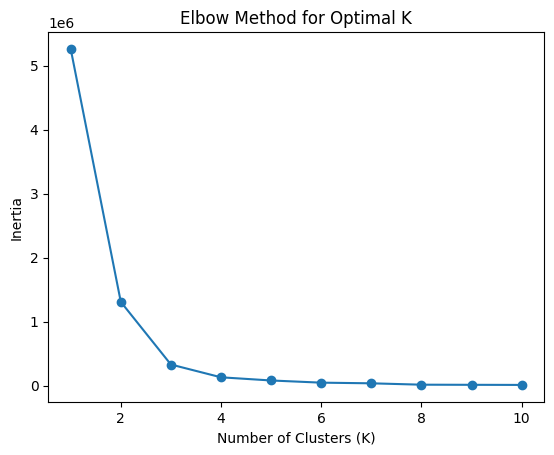

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use a small sample of 1000 data points for faster computation.
data_sample = data_numeric.sample(1000, random_state=42)

# Calculate inertia for cluster counts from 1 to 10.
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sample)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to visualize optimal K.
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

**Objective 4: Applying K-Means Clustering**

**Goal:** Cluster the data.

**What You’ll Learn:** Unsupervised learning.

In [ ]:
# Set the K-Means (based on the Elbow curve).
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit K-Means and predict clusters.
clusters = kmeans.fit_predict(data_sample)

# Add the cluster labels to the dataframe.
data_sample['Cluster'] = clusters

# Quick look of the Cluster dataset.
print(data_sample.head())
print("Cluster counts:", data_sample['Cluster'].value_counts())

        Quantity  UnitPrice  Cluster
459141         6       2.08        0
262111        12       2.95        0
374705        16       0.83        0
263904         2       8.50        0
138970       200       1.65        0
Cluster counts: Cluster
0    998
1      1
2      1
Name: count, dtype: int64


**Objective 5: Reducing with PCA**

**Goal:** Simplify data to 2D.

**What You’ll Learn:** Dimensionality reduction.

In [ ]:
from sklearn.decomposition import PCA

# Select features for PCA.
features = data_sample[['Quantity', 'UnitPrice']]

# Reduce components to 2D.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Create a new dataframe with the PCA results and assign cluster labels.
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Quick look of the PCA results and the explained variance ratio.
print(pca_df.head())
print("Explained variance ratio:", pca.explained_variance_ratio_)

          PC1       PC2  Cluster
0   -7.148232 -0.662017        0
1   -1.150612  0.224242        0
2    2.855119 -1.884908        0
3  -11.165618  5.747117        0
4  186.852221 -0.566187        0
Explained variance ratio: [0.99853231 0.00146769]


**Objective 6: Visualizing and Sharing**

**Goal:** Plot results and share.

**What You’ll Learn:** Combining ML and visualization.

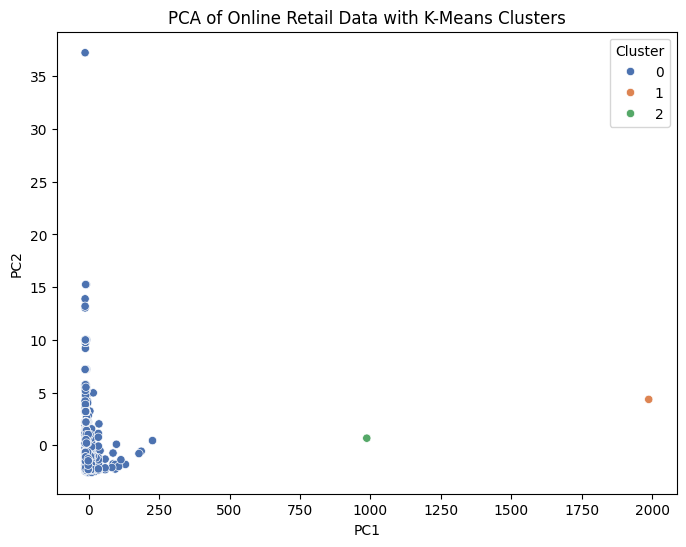

Final Cluster counts: Cluster
0    998
1      1
2      1
Name: count, dtype: int64
Explained variance ratio from PCA: [0.99853231 0.00146769]


In [ ]:
import seaborn as sns

# Visualize the clusters using the PCA results.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='deep')
plt.title("PCA of Online Retail Data with K-Means Clusters")
plt.show()

# Print final cluster counts and PCA explained variance details.
print("Final Cluster counts:", data_sample['Cluster'].value_counts())
print("Explained variance ratio from PCA:", pca.explained_variance_ratio_)